# Fraud Detection Explorotary Data Analysis of the Dataset



In [5]:
# Import of all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import seaborn as sns
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Import of Dataset

Import of the datasets into Panda dataframe

Initial modifications to add an ID and use it instead of the Time 



In [6]:
# Connecting the Google drive with Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Import of the train and test datasets into the Panda dataframe from Google drive 
# To load data from the local drive the location below can be changed accordingly

cc_test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_test.csv")
cc_train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_train.csv")

cc_test_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,71852.0,-0.584007,0.880079,1.320090,0.001509,0.292260,-0.990634,1.120755,-0.166826,-0.501695,-0.694423,-0.706512,-0.164179,-0.276469,0.284019,0.164088,0.265888,-0.739878,-0.034332,-1.077470,-0.106804,0.167209,0.361133,-0.125141,0.375231,0.029598,-0.559438,0.102098,0.144502,42.81,0
1,48336.0,1.326714,-0.823441,-0.127404,-0.979830,-0.625116,-0.104941,-0.636415,0.050208,-0.785860,0.815473,0.200606,-1.002079,-1.025594,0.271240,0.320012,1.751346,-0.362698,-0.350818,1.235828,0.164916,0.109578,-0.011447,-0.212676,-0.859332,0.507870,-0.199817,-0.021529,0.003230,75.00,0
2,166298.0,2.097691,-0.076097,-1.743719,-0.011746,0.597501,-0.332470,0.130716,-0.174237,0.383371,0.171848,0.110069,0.740958,0.344720,0.589561,0.147784,0.230686,-1.103407,0.675318,0.395078,-0.192933,0.233496,0.825427,-0.143247,-1.115397,0.374189,-0.056085,-0.020643,-0.079921,2.29,0
3,40650.0,-1.593912,2.215525,0.210067,-0.236255,-0.002224,-0.058601,-0.392776,-2.005520,-0.306309,-0.253465,-0.892002,0.681270,1.539975,-0.407657,0.740105,0.687552,-0.019201,0.040053,0.133313,-0.258684,1.995801,-1.554302,0.261539,-0.531345,0.124584,0.146124,0.346683,0.104860,8.99,0
4,121428.0,1.863194,0.265005,-0.261564,3.853830,0.220877,0.773558,-0.296455,0.207090,-0.487512,1.454433,-0.245666,0.610215,-0.153871,-0.147691,-2.586887,0.606259,-0.701786,0.034701,-0.923304,-0.311545,0.118870,0.611417,0.034731,-0.387779,0.103574,0.140670,-0.003506,-0.061238,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,116793.0,-0.753070,1.600625,-1.694466,-1.448546,1.130943,-0.976420,1.167232,0.201294,-0.245013,0.113600,-0.376961,-0.064316,-1.027914,1.212622,-0.719329,-0.053734,-0.817776,0.558632,0.478907,0.050720,0.202703,0.725051,-0.303092,-1.016408,-0.107503,0.146474,0.469657,0.304103,0.75,0
85439,57942.0,-0.539994,0.515511,2.029197,0.514863,-0.043655,-0.275000,0.851781,-0.059080,0.319422,-0.573884,-0.550373,-0.258060,-1.541622,-0.192496,-0.756751,-0.702496,0.159027,-0.787307,-1.142297,-0.173193,0.059047,0.441880,-0.048056,0.574042,-0.252453,-0.545212,-0.007875,-0.067811,40.00,0
85440,53165.0,-1.833594,-1.015652,1.217378,-1.464593,-0.448623,-0.955303,-0.496368,0.481275,-1.151529,-0.210526,-1.014940,-0.517389,0.895314,-0.274270,0.320422,1.832300,-0.170460,-0.889855,-0.041644,0.754963,0.363656,0.279139,0.166895,-0.118669,-0.005576,-0.438610,0.209083,-0.049870,140.00,0
85441,166438.0,1.373911,-0.999031,-1.694373,1.057884,-0.413288,-1.033805,0.412863,-0.382925,0.640802,-0.550427,-0.477887,0.329516,0.595095,-1.184722,0.311344,0.375467,0.528451,0.493846,-0.607897,0.537641,0.470784,0.868639,-0.348918,0.059266,0.041987,0.580518,-0.086933,0.025684,343.39,0


In [8]:
# Functiona to create a list to be used as ID for the data frame 
def id_create(df):
    id = []
    for i in range(df.shape[0]):
        id.append(i+1)
    return id

# For the test data frame created an ID list and added to the data frame 
id_test = id_create(cc_test_df)
cc_test_df["Id"] = id_test
cc_test_df.set_index("Id", inplace=True)

# For the train data frame created an ID list and added to the data frame 
id_train = id_create(cc_train_df)
cc_train_df["Id"] = id_train
cc_train_df.set_index("Id", inplace=True)



## Check of the missing value

The dataframe information and description along with the missing label plots shows that there isn't any missing or NA value


In [9]:
print("Dataframe information of the train dataset")
print(cc_train_df.info())
print()
print("Dataframe information of the test dataset")
print(cc_test_df.info())


Dataframe information of the train dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 1 to 199364
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20  

In [ ]:
# Missing label plot for the train dataset
msno.matrix(cc_train_df, labels=True)

In [ ]:
# Missing label plot for the test dataset
msno.matrix(cc_test_df, labels=True)

In [ ]:
print("Dataframe description of the train dataset")
print(cc_train_df.describe())
print()
print("Dataframe description of the test dataset")
print(cc_test_df.describe())


Dataframe description of the train dataset
                Time             V1  ...         Amount          Class
count  199364.000000  199364.000000  ...  199364.000000  199364.000000
mean    94806.201064       0.004189  ...      88.761549       0.001826
std     47511.693849       1.954728  ...     253.776731       0.042691
min         0.000000     -56.407510  ...       0.000000       0.000000
25%     54206.250000      -0.918115  ...       5.500000       0.000000
50%     84650.000000       0.023565  ...      21.990000       0.000000
75%    139350.250000       1.317063  ...      77.000000       0.000000
max    172792.000000       2.454930  ...   25691.160000       1.000000

[8 rows x 31 columns]

Dataframe description of the test dataset
                Time            V1  ...        Amount         Class
count   85443.000000  85443.000000  ...  85443.000000  85443.000000
mean    94831.729164     -0.009775  ...     87.388463      0.001498
std     47433.429276      1.967899  ...    241.3

## Duplicate values

Duplicate in the training dataset are dropped and the on in the test dataset are kept



In [10]:
# Dupplicate in the train dataset
print("Number of dupplicate in the training set ", cc_train_df.duplicated().sum())

# Dupplicate in the test dataset
print("Number of dupplicate in the test set ", cc_test_df.duplicated().sum())


Number of dupplicate in the training set  585
Number of dupplicate in the test set  131


In [11]:
# Dropping the duplicate and keeping the first of the training  dataset
cc_train_df.drop_duplicates(keep='first', inplace=True)


In [12]:
# Dupplicate in the train dataset
print("Number of dupplicate in the training set ", cc_train_df.duplicated().sum())

# Dupplicate in the test dataset
print("Number of dupplicate in the test set ", cc_test_df.duplicated().sum())

Number of dupplicate in the training set  0
Number of dupplicate in the test set  131


## Data type

The Class column in data frame is of type int64
It's value can be only 0 o 1, keep as it is so the correlation can be correlated

In [ ]:
# Conversion to a category type
#cc_train_df["Class"] = cc_train_df["Class"].astype("category")
#cc_train_df["Class"].describe()

In [ ]:
# Conversion to a category type
#cc_test_df["Class"] = cc_test_df["Class"].astype("category")
#cc_test_df["Class"].describe()

## Datset Corelation

Exploring the dataset correlation


In [13]:
# list of all the columns minus the "Class"
columns = cc_test_df.columns.tolist()
columns_to_remove = ["Class"]

## Remove a list from another list
columns = [var for var in columns if var not in columns_to_remove]
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
# Tried to run the below code to get the picture for all the features but it wouldn't show all the picture, tried VSCode and Jupyter notebook
# So i will plot the each of the feature separately
'''
for i, cat in enumerate(columns):
  fig = px.scatter(cc_train_df, x=cat, y="Class")
  fig.show()
'''

In [14]:
# Function to plot the scatter plot and violin plot

def plotting(x, y):
    title = "Scatter plot training set " + x + " vs " + y
    fig = px.scatter(cc_train_df, x=x, y=y, title=title)
    fig.show()

    title = "Violin plot training set " + x + " vs " + y
    fig = px.violin(cc_train_df, y=y, x=x, box=True, title=title)
    fig.update_layout(xaxis_type="category", xaxis={'categoryorder':'mean ascending'})
    fig.show()

    title = "Test set " + x + " vs " + y
    fig = px.scatter(cc_test_df, x=x, y=y, title=title)
    fig.show()

    title = "Violin plot test set " + x + " vs " + y
    fig = px.violin(cc_test_df, y=y, x=x, box=True, title=title)
    fig.update_layout(xaxis_type="category", xaxis={'categoryorder':'mean ascending'})
    fig.show()
  
  

In [ ]:
# Correlation of the Time

plotting("Class", "Time")


There is correlation Between Time and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V1
plotting("Class", "V1")


There is correlation Between V1 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers below -40

In [ ]:
# Correlation of the V2
plotting("Class", "V2")

There is correlation Between V2 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers below -40

In [ ]:
# Correlation of the V3
plotting("Class", "V3")

There is correlation Between V3 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers below -35

In [ ]:
# Correlation of the V4
plotting("Class", "V4")

There is correlation Between V4 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 15

In [ ]:
# Correlation of the V5
plotting("Class", "V5")

There is correlation Between V5 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 40 and less than 40

In [ ]:
# Correlation of the V6
plotting("Class", "V6")

There is correlation Between V6 and the Classification of the Fraud detection based on the above graphs and data dispersion


Outliers greater than 25

In [ ]:
# Correlation of the V7
plotting("Class", "V7")

There is correlation Between V7 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 60

In [ ]:
# Correlation of the V8
plotting("Class", "V8")

There is correlation Between V4 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V9
plotting("Class", "V9")

There is correlation Between V9 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 15

In [ ]:
# Correlation of the V10
plotting("Class", "V10")

There is correlation Between V10 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 20

In [ ]:
# Correlation of the V11
plotting("Class", "V11")

There is correlation Between V11 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V12
plotting("Class", "V12")

There is correlation Between V12 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V13
plotting("Class", "V13")

There isn't any correlation Between V13 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 6

In [ ]:
# Correlation of the V14
plotting("Class", "V14")

There is correlation Between V14 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V15
plotting("Class", "V15")

There isn't correlation Between V15 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 6

In [ ]:
# Correlation of the V16
plotting("Class", "V16")

There is correlation Between V16 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 10

In [ ]:
# Correlation of the V17
plotting("Class", "V17")

There is correlation Between V17 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V18
plotting("Class", "V18")

There is correlation Between V18 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V19
plotting("Class", "V19")

There is correlation Between V19 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -6

In [ ]:
# Correlation of the V20
plotting("Class", "V20")

There is correlation Between V20 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -40

In [ ]:
# Correlation of the V21
plotting("Class", "V21")

There is correlation Between V21 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 20 and less than -20

In [ ]:
# Correlation of the V22
plotting("Class", "V22")

There is correlation Between V22 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 10 and less than 10

In [ ]:
# Correlation of the V23
plotting("Class", "V23")

There is correlation Between V23 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -40

In [ ]:
# Correlation of the V24
plotting("Class", "V24")

There is correlation Between V24 and the Classification of the Fraud detection based on the above graphs and data dispersion even though looks like is slight

Outliers greater than 2.5

In [ ]:
# Correlation of the V25
plotting("Class", "V25")

There is some correlation Between V25 and the Classification of the Fraud detection based on the above graphs and data dispersion even though is quite slight

Outliers less than -10

In [ ]:
# Correlation of the V26
plotting("Class", "V26")

There is correlation Between V26 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -2

In [ ]:
# Correlation of the V27
plotting("Class", "V27")

There is small correlation Between V27 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater tha 13 and less than -10

In [ ]:
# Correlation of the V28
plotting("Class", "V28")

There is correlation Between V28 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 20 less than -10

In [ ]:
# Correlation of the Amount
plotting("Class", "Amount")

There is correlation Between Amount and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 6000

In [15]:
## Remove the outliers
# first created the zip between the column and the value over which there are outliers
vars_with_outliers_threshold_high = [("V4", 15), ("V5", 40), ("V6", 25), ("V7", 60), ("V9", 15), ("V10", 20), ("V13", 6), ("V15", 6), ("V16", 10), ("V20", 27), ("V21", 20), ("V22", 10), ("V24", 25), ("V27", 13), ("V28", 20), ("Amount", 6000)]
vars_with_outliers_threshold_low = [("V1", -40), ("V2", -40), ("V3", -35), ("V5", -40), ("V19", -6), ("V20", -40), ("V21", -20), ("V22", -10), ("V23", -40), ("V25", -10), ("V26", -2), ("V27", -10), ("V28", -10)]

# for loops to get rid of the outliers greater and lower than threshold
for var_name, threshold in vars_with_outliers_threshold_high:
    cc_train_df = cc_train_df[cc_train_df[var_name] < threshold]
    
cc_train_df

for var_name, threshold in vars_with_outliers_threshold_low:
    cc_train_df = cc_train_df[cc_train_df[var_name] > threshold]
    
cc_train_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,33419.0,-2.178201,-3.132187,1.315758,-0.129783,-2.736013,0.743459,-0.752718,-2.650826,-0.184284,-1.392226,-1.114831,0.253591,-0.428280,-0.724290,-2.442338,0.649252,1.192440,-1.782696,0.014677,2.534626,-0.828762,-0.219136,-1.004913,0.788588,1.061994,-0.319407,-0.132313,0.333476,937.75,0
2,151317.0,2.064423,0.185575,-1.684612,0.411066,0.479555,-0.797963,0.205544,-0.240568,0.415454,-0.401418,-0.411296,0.439120,0.554022,-0.936324,0.196285,0.227611,0.510030,-0.465360,-0.031358,-0.130661,-0.351331,-0.876025,0.343288,0.522189,-0.259568,0.173623,-0.056280,-0.029665,1.98,0
3,132434.0,-0.547505,0.798072,-0.719939,-1.129561,0.925708,0.763338,0.231338,0.799204,-0.277812,-0.348452,0.511676,-0.034514,-1.390963,1.067757,0.423194,-0.262177,-0.003822,-0.601821,-0.988247,-0.313966,0.366664,1.068933,-0.101523,-1.604148,-0.318277,0.838076,0.012324,-0.015564,11.95,0
4,81787.0,-0.945710,0.323579,0.595681,-1.288095,0.818906,-0.748491,0.890076,-0.130671,-0.471365,-0.389743,0.537702,0.137711,-0.555964,0.457870,-0.277456,0.662419,-0.951232,-0.103400,0.466225,-0.263767,-0.371528,-1.149510,0.217859,-0.507989,-0.026857,0.591496,-0.326179,-0.007543,24.98,0
5,125062.0,1.898722,-0.321038,-1.771837,0.672408,0.115019,-1.267347,0.612810,-0.441070,0.450298,0.107004,-1.144233,-0.035721,-0.728277,0.565399,-0.368894,-0.494280,-0.107078,-0.658594,0.169095,-0.082106,0.015111,0.006269,-0.029094,-0.071333,0.179444,0.378225,-0.106042,-0.059506,104.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199360,140177.0,2.164466,-1.721358,0.118546,-1.363516,-2.147961,-0.486731,-1.755439,-0.023992,-0.563216,1.457773,-1.097192,-0.654407,0.621714,-0.925904,0.076346,-0.105142,0.329165,0.269093,-0.346530,-0.356177,-0.123266,0.138772,0.319598,0.018634,-0.560967,-0.251774,0.060706,-0.023599,48.00,0
199361,71541.0,1.070134,0.181228,0.670405,1.351215,-0.617646,-1.019820,0.203157,-0.194571,-0.043719,-0.006449,-0.021080,0.380856,-0.011871,0.369452,0.981649,0.211580,-0.374066,-0.524216,-0.440469,-0.018276,-0.260380,-0.931052,0.149692,0.647047,0.204529,-0.739666,0.012326,0.046917,70.00,0
199362,128249.0,2.111207,-0.687175,-1.637544,-1.931276,-0.244434,-1.065946,-0.062955,-0.269111,2.439795,-1.334028,-0.857487,0.928522,-0.293575,0.177409,0.459425,-1.582800,0.227376,-0.173021,1.221354,-0.220178,0.115593,0.742015,-0.011124,0.731225,0.455436,-0.671152,0.039939,-0.051133,7.99,0


Fron Training set 43 outliers have been removed

In [ ]:
# correlation matrix between the features
cc_train_df.corr()

In [16]:
# correlation array between the Class output and the other features
cc_train_df.corr()["Class"]

Time     -0.012075
V1       -0.095455
V2        0.088403
V3       -0.187832
V4        0.132874
V5       -0.089402
V6       -0.048434
V7       -0.178078
V8        0.041927
V9       -0.096322
V10      -0.211447
V11       0.155233
V12      -0.257261
V13      -0.003944
V14      -0.307595
V15      -0.003672
V16      -0.191338
V17      -0.319454
V18      -0.105728
V19       0.033639
V20       0.022614
V21       0.030573
V22       0.003995
V23      -0.012310
V24      -0.006217
V25       0.003205
V26       0.004514
V27       0.026787
V28       0.010133
Amount    0.007789
Class     1.000000
Name: Class, dtype: float64

The Correlation matrix Shows that the correlation for V13, V15 is below -0.003 and V22, V25, V26 have correlation value smaller than 0.004
So i think this 5 features can be discarded, this can be seen also in the heatmap for the training and test set

In [ ]:
# Heatmap of the data correlation of training set

fig = px.imshow(cc_train_df.corr(), title="Correlation heatmap of the features from the training set")
fig.update_layout(height=1000)
fig.update_xaxes(showticklabels=True, tickmode='linear').update_yaxes(showticklabels=True, tickmode='linear')
fig.show()

In [ ]:
# Heatmap of the data correlation of testing set

fig = px.imshow(cc_test_df.corr(), title="Correlation heatmap of the features from the testing set")
fig.update_layout(height=800)
fig.show()

Found some features which have negligible correlation with the Class so will be removed

In [17]:
# to remove the features with negligible level of correlation

columns_no_correlation = ["V13", "V15", "V22", "V25", "V26"]

columns_with_correlation = [var for var in columns if var not in columns_no_correlation]
columns_with_correlation

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V23',
 'V24',
 'V27',
 'V28',
 'Amount']

## Statistical Modelling

Statistical modelling of the data with Linear regression

In [18]:
## Build a function to construct a formula string
def build_formula_string(response_var, cat_vars, num_vars):
    categorical_list = ["C({})".format(var) for var in cat_vars]
    categorical_string = " + ".join(categorical_list)
    numeric_string = " + ".join(num_vars)
    formula_string = "{} ~ {} + {}".format(response_var, categorical_string, numeric_string)
    
    return formula_string


In [19]:
# create the formula string to be used for statsmodel

numeric_data = columns_with_correlation
categorical_data = []

formula_string = build_formula_string("Class", categorical_data, numeric_data)

formula_string

'Class ~  + Time + V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V14 + V16 + V17 + V18 + V19 + V20 + V21 + V23 + V24 + V27 + V28 + Amount'

In [ ]:
# fitting the statsmodel and visualizing the summary

baseline_model = smf.ols(formula_string, cc_train_df).fit()
baseline_model.summary()

In [ ]:
## Function-ize the fitted vs residual plots, and the qq plot
def plot_fitted_vs_resid(fitted_values, residuals, model_name):
    fig = px.scatter(x=fitted_values, y=residuals, labels={"x": "Fitted Values", "y": "Residuals"}, 
                      title="{} model, fitted values vs residuals".format(model_name))
    fig.show()
    
def plot_qq(residuals, model_name):
    fig = sm.qqplot(residuals, fit=True, line='45')
    plt.title("QQ Plot of {} model residuals".format(model_name))
    plt.show()
    


In [ ]:
# To plot the residuals and the QQ plot
plot_fitted_vs_resid(baseline_model.fittedvalues, baseline_model.resid, "Baseline")
plot_qq(baseline_model.resid, "Baseline")

Looking into the above graphs the  residual are not statistically independent 
and homoscedasicity, plus the residuals are not normal

In [ ]:
# function to augment the dataframe columns 
def augmented_dataframe(dataframe, response_col_name):
  augmented_df = dataframe

  ## Drop the response_variable from the augmented dataframe (we'll add it back in later)
  augmented_df = augmented_df.drop(response_col_name, axis=1)

  for col in augmented_df.columns:
    augmented_df[col+"_"+str(2)] = augmented_df[col] ** 2
    augmented_df[col+"_"+str(3)] = augmented_df[col] ** 3

  ## Add response_col_name from dataframe back into augmented_df
  augmented_df[response_col_name] = dataframe[response_col_name] 

  return augmented_df


# function to prune the model with unnecessary features
def prune_models(dataframe, response_col_name):

  ## Define the first part of our formula string 
  init_formula_string = response_col_name + " ~ "
    
    ### Assign cols_no_response to the list of the dataframe columns
  cols_no_response = dataframe.columns.tolist()
    ### <Remove> the response column name
  cols_no_response.remove(response_col_name)
    ### <Join> the string (using ' + ') as the join seperator
  rest_of_formula_string = " + ".join(cols_no_response)
    
    ## Concat the two strings together (in a new variable) to obtain our full formula string 
  formula_string = init_formula_string + rest_of_formula_string

    ## Fit the initial model variation 
  model_init = smf.ols(formula_string, data=dataframe).fit()
    
    ## Assign a p-values variable 
  pvalues = model_init.pvalues
    
    ## Find the variable with the highest p-value 
  max_p = pvalues.idxmax()
    
    ## alpha threshhold at 0.05 
  alpha = 0.05
    

    # <While> loop over our p-values with the condition that the max value is above our alpha threshold 
    # Identify the variable with the maximum p-value 
    # Drop this variable from our cols_no_response list 
    # Create a new formula string 
    # Fit the new model 
    # Re-declare our p-values variable 
    # <Drop> the Intercept attribute 
    # Once our while loop breaks, return the model 

    
  while pvalues.max() > alpha:

    max_p = pvalues.idxmax()
    cols_no_response.remove(max_p)
    
    rest_of_formula_string = " + ".join(cols_no_response)
    formula_string = init_formula_string + rest_of_formula_string
        
    model = smf.ols(formula_string, data=dataframe).fit()
    pvalues = model.pvalues
    pvalues = pvalues.drop("Intercept")
        
  return model
    


In [ ]:
# model with automatic pruning of the features 

model_with_pruned_df = prune_models(cc_train_df, "Class")
model_with_pruned_df.summary()

In [ ]:
# augmentation and automatic pruning of the features
augmented_test_df = augmented_dataframe(cc_train_df, "Class")

model_aug_pruned_df = prune_models(augmented_test_df, "Class")
model_aug_pruned_df.summary()

In [ ]:
# To plot the residuals and the QQ plot
plot_fitted_vs_resid(model_aug_pruned_df.fittedvalues, model_aug_pruned_df.resid, "Baseline")
plot_qq(model_aug_pruned_df.resid, "Baseline")

Tried the automatic pruning with alpha of 0.05 no improvement of the model adjusted r square

Tried with augmentation up to cubic of all the columns of the dataset with automatic pruning
the result of the  adjusted r squareis worst and theere is no improvements on the  residuals statistical independence and homoscedasicity, plus still the residuals are not normal

In [ ]:
# function to calculate the box cox transformation

def calculate_and_plot_boxcox(variable, alpha=0.05, title_string="", plot_lower_bound=-20, plot_upper_bound=20):
    transformed_data, best_lambda, conf = stats.boxcox(variable, alpha=alpha)
    lambdas, corr_coef = stats.boxcox_normplot(variable, plot_lower_bound, plot_upper_bound)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=lambdas, y=corr_coef))
    fig.add_shape(dict(type="line", x0=best_lambda, x1=best_lambda, y0=0, y1=1))
    fig.add_shape(dict(type="line", x0=conf[0], x1=conf[0], y0=0, y1=1, line=dict(color="Red", width=1)))
    fig.add_shape(dict(type="line", x0=conf[1], x1=conf[1], y0=0, y1=1, line=dict(color="Red", width=1)))
    fig.add_shape(dict(type="line", x0=1, x1=1, y0=0, y1=1, line=dict(color="Red", width=1, dash="dash")))
    fig.update_layout(xaxis_title="Lambda Value", yaxis_title="Correlation Coefficient", title="Box-Cox Normality Plot ({})".format(title_string))
    
    # return the confidence interval too
    return transformed_data, best_lambda, conf, fig

As in the data frame there are columns with negative value the box cox transformations are not working

So to over come the issue i'm going to implement the solution as per:
https://stats.stackexchange.com/questions/399435/which-constant-to-add-when-applying-box-cox-transformation-to-negative-values
whihc says to add a constant value to all the column of that partivular feature to make them all positive

In [ ]:
# Function to make all the column with positive value
# takes input a the training and test data frame and a list of columns
# for loop ove the clumns and finds the minimum value between test and training set 
# and offsets both set for the minimum value per column if the minimum is negative

def positive_df(training_df, test_df, columns_list):
  for col in columns_list:
    min  = training_df[col].min()
    if min > test_df[col].min():
      min = test_df[col].min()
    
    if min < 0:
      training_df[col] = training_df[col] - min
      test_df[col] = test_df[col] - min
  
  return training_df, test_df


In [ ]:
# make positive all the dataframe

ps_train_df, ps_test_df = positive_df(cc_train_df, cc_test_df, columns_with_correlation)


In [ ]:
## Loop over the numeric data and print the variable name alongside the best lambda transformation and it's confidence interval
## going to use the columns_with_correlation previously calculated

eps = 1e-6
numeric_data = columns_with_correlation
for var in numeric_data:
    _, best_lambda, conf, _ = calculate_and_plot_boxcox(ps_train_df[var] + eps)
    print(var, "\t", best_lambda, "\t", conf)

In [ ]:
I'm going to ignore all the transformation greater than 3

In [ ]:
ps_train_df["Time_trans"] = ps_train_df["Time"]**0.5  # the lambda found is 0.77 so approximated to 0.5
ps_test_df["Time_trans"] = ps_test_df["Time"]**0.5    # same transformation on the testing set

ps_train_df["V4_trans"] = ps_train_df["V4"]**0.5  # the lambda found is 0.56 so approximated to 0.5
ps_test_df["V4_trans"] = ps_test_df["V4"]**0.5    # same transformation on the testing set

ps_train_df["V5_trans"] = ps_train_df["V5"]**1.5  # the lambda found is 1.5 
ps_test_df["V5_trans"] = ps_test_df["V5"]**1.5    # same transformation on the testing set

ps_train_df["V6_trans"] = ps_train_df["V6"]**0.5  # the lambda found is 0.41 so approximated to 0.5
ps_test_df["V6_trans"] = ps_test_df["V6"]**0.5    # same transformation on the testing set

ps_train_df["V7_trans"] = ps_train_df["V7"]**1.5  # the lambda found is 1.54 so approximated to 1.5
ps_test_df["V7_trans"] = ps_test_df["V7"]**1.5    # same transformation on the testing set

ps_train_df["V9_trans"] = ps_train_df["V9"]**0.5  # the lambda found is 0.47 so approximated to 0.5
ps_test_df["V9_trans"] = ps_test_df["V9"]**0.5    # same transformation on the testing set

ps_train_df["V10_trans"] = ps_train_df["V10"]**0.5  # the lambda found is 0.72 so approximated to 0.5
ps_test_df["V10_trans"] = ps_test_df["V10"]**0.5    # same transformation on the testing set

ps_train_df["V11_trans"] = ps_train_df["V11"]**0.5  # the lambda found is 0.58 so approximated to 0.5
ps_test_df["V11_trans"] = ps_test_df["V11"]**0.5    # same transformation on the testing set

ps_train_df["V14_trans"] = ps_train_df["V14"]**3  # the lambda found is 3.46 so approximated to 3
ps_test_df["V14_trans"] = ps_test_df["V14"]**3    # same transformation on the testing set

ps_train_df["V16_trans"] = ps_train_df["V16"]**3  # the lambda found is 3.12 so approximated to 3
ps_test_df["V16_trans"] = ps_test_df["V16"]**3    # same transformation on the testing set

ps_train_df["V17_trans"] = ps_train_df["V17"]**3  # the lambda found is 2.8 so approximated to 3
ps_test_df["V17_trans"] = ps_test_df["V17"]**3    # same transformation on the testing set

ps_train_df["V18_trans"] = ps_train_df["V18"]**1.5  # the lambda found is 1.56 so approximated to 1.5
ps_test_df["V18_trans"] = ps_test_df["V18"]**1.5    # same transformation on the testing set

ps_train_df["V20_trans"] = ps_train_df["V20"]**2  # the lambda found is 1.96 so approximated to 2
ps_test_df["V20_trans"] = ps_test_df["V20"]**2    # same transformation on the testing set

ps_train_df["V21_trans"] = np.log(ps_train_df["V21"] + eps)  # the lambda found is 0.15 so approximated to log
ps_test_df["V21_trans"] = np.log(ps_test_df["V21"] + eps)    # same transformation on the testing set

ps_train_df["V23_trans"] = ps_train_df["V23"]**2  # the lambda found is 2.08 so approximated to 2
ps_test_df["V23_trans"] = ps_test_df["V23"]**2    # same transformation on the testing set

ps_train_df["V24_trans"] = ps_train_df["V24"]**1.5  # the lambda found is 1.7 so approximated to 1.5
ps_test_df["V24_trans"] = ps_test_df["V24"]**1.5    # same transformation on the testing set

ps_train_df["V27_trans"] = ps_train_df["V27"]**2  # the lambda found is 1.8 so approximated to 2
ps_test_df["V27_trans"] = ps_test_df["V27"]**2    # same transformation on the testing set

ps_train_df["Amount_trans"] = np.log(ps_train_df["Amount"] + eps)  # the lambda found is 0.12 so approximated to log
ps_test_df["Amount_trans"] = np.log(ps_test_df["Amount"] + eps)    # same transformation on the testing set

In [ ]:
# Column with the new names
column_cor_transform = ['Time_trans', 'V1', 'V2', 'V3', 'V4_trans', 'V5_trans', 'V6_trans', 'V7_trans', 'V8', 'V9_trans', 'V10_trans', 'V11_trans', 'V12', 'V14_trans', 
                        'V16_trans', 'V17_trans', 'V18_trans', 'V19', 'V20_trans', 'V21_trans', 'V23_trans', 'V24_trans', 'V27_trans', 'V28', 'Amount_trans']

In [ ]:
# create the statistical model with the new columns with the transformation
numeric_data = column_cor_transform
categorical_data = []

formula_string_trans = build_formula_string("Class", categorical_data, numeric_data)

transformed_df_model = smf.ols(formula_string_trans, ps_train_df).fit()
transformed_df_model.summary()

In [ ]:
# To plot the residuals and the QQ plot
plot_fitted_vs_resid(transformed_df_model.fittedvalues, transformed_df_model.resid, "Baseline")
plot_qq(transformed_df_model.resid, "Baseline")

All the Above was done under the assumption that the use of linear regression model needs to be used along with his assumption but that is my wrong assumption

The Logistic regression needs to be used along with his assumption which are different from the Linear regression


**Logistic regression with stats model**

Use of the stats model to check the influential Features and to drop the feature which are not relevant to the model

In [20]:
base_regression_model = smf.logit(formula_string, cc_train_df).fit()

base_regression_model.summary()

Optimization terminated successfully.
         Current function value: 0.003979
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               198736
Model:                          Logit   Df Residuals:                   198710
Method:                           MLE   Df Model:                           25
Date:                Sun, 25 Oct 2020   Pseudo R-squ.:                  0.6938
Time:                        22:16:23   Log-Likelihood:                -790.73
converged:                       True   LL-Null:                       -2582.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5744      0.279    -30.757      0.000      -9.121      -8.028
Time       -2.694e-07   2.41e-06     -0.112      0.911      -5e-06    4.46e-06
V1             0.1193      0.050      2.380      0.017       0.021       0.218
V2             0.0155      0.064      0.245      0.807      -0.109       0.140
V3             0.0465      0.062      0.747      0.455      -0.075       0.168
V4             0.6662      0.083      8.038      0.000       0.504       0.829
V5             0.1340      0.073      1.836      0.066      -0.009       0.277
V6            -0.1045      0.080     -1.312      0.190      -0.261       0.052
V7            -0.1018      0.077     -1.327      0.185      -0.252       0.049
V8            -0.2185      0.039     -5.653      0.000      -0.294      -0.143
V9            -0.2826      0.122     -2.323      0.020      -0.521      -0.044
V10           -0.7896      0.115     -6.869      0.000      -1.015      -0.564
V11            0.0283      0.096      0.295      0.768      -0.160       0.216
V12            0.0433      0.098      0.442      0.659      -0.149       0.235
V14           -0.5573      0.074     -7.522      0.000      -0.703      -0.412
V16           -0.2578      0.129     -1.993      0.046      -0.511      -0.004
V17           -0.1284      0.081     -1.583      0.113      -0.287       0.031
V18            0.0535      0.139      0.385      0.701      -0.219       0.326
V19            0.0544      0.106      0.515      0.607      -0.153       0.262
V20           -0.4094      0.106     -3.864      0.000      -0.617      -0.202
V21            0.1701      0.054      3.123      0.002       0.063       0.277
V23           -0.0580      0.061     -0.947      0.344      -0.178       0.062
V24            0.2765      0.171      1.621      0.105      -0.058       0.611
V27           -0.9471      0.164     -5.775      0.000      -1.269      -0.626
V28           -0.4333      0.149     -2.909      0.004      -0.725      -0.141
Amount         0.0013      0.000      2.797      0.005       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The logistic regression has different assumption and with logistic regression, the focus is on assessing the model's adequacy 



Reference: https://www.pythonfordatascience.org/logistic-regression-python/

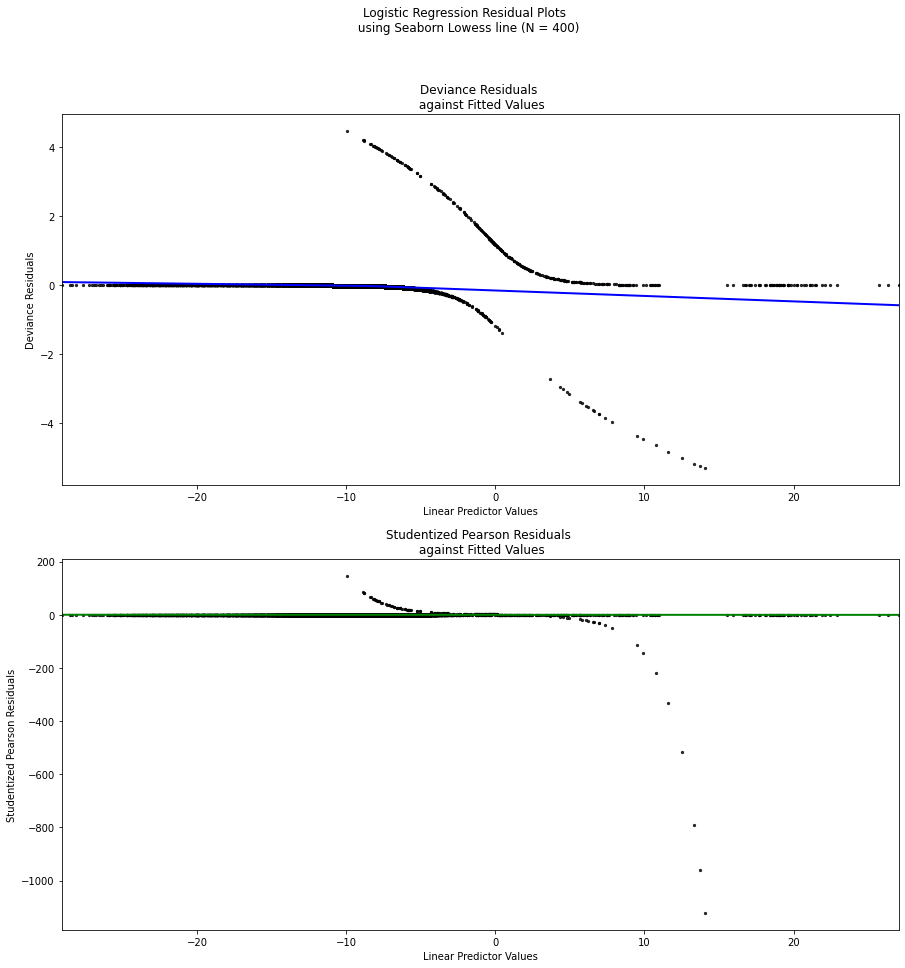

In [ ]:
## Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 400)")


# Deviance Residuals
sns.regplot(x=base_regression_model.fittedvalues, y=base_regression_model.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(x=base_regression_model.fittedvalues, y=base_regression_model.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

From : https://medium.com/@dhiraj8899/top-5-assumptions-for-logistic-regression-96b11d24d357

There are 5 assumption for the logistic regression:

1.   The logistic regression assumes that there is minimal or no multicollinearity among the independent variables. 
2.   The Logistic regression assumes that the independent variables are linearly related to the log of odds.
3. The logistic regression usually requires a large sample size to predict properly.
4. The Logistic regression which has two classes assumes that the dependent variable is binary and ordered logistic regression requires the dependent variable to be ordered, for example Too Little, About Right, Too Much.
5. The Logistic regression assumes the observations to be independent of each other.

Check on the Logistic regression assumption

1.   The heatmap of the dataframe shows no correlation between the features
2.   The graphs of logit value against the features should be linear 
3.   The datset is quite large so should satisfy the assumption
4.   The logistic regression has one class with binary value so should satify the assumption
5.   The data don't have the duplicates so the observation are indipendent




In [ ]:
# Anova doesn't run on the logistic regression logit model

sm.stats.anova_lm(base_regression_model, test="Chisq", typ=3)

AttributeError: ignored

As the Anova doesn't run other way needs to be defined to check the influential and non influential features

In [ ]:
base_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               198736
Model:                          Logit   Df Residuals:                   198710
Method:                           MLE   Df Model:                           25
Date:                Sat, 24 Oct 2020   Pseudo R-squ.:                  0.6938
Time:                        17:31:04   Log-Likelihood:                -790.73
converged:                       True   LL-Null:                       -2582.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5744      0.279    -30.757      0.000      -9.121      -8.028
Time       -2.694e-07   2.41e-06     -0.112      0.911      -5e-06    4.46e-06
V1             0.1193      0.050      2.380      0.017       0.021       0.218
V2             0.0155      0.064      0.245      0.807      -0.109       0.140
V3             0.0465      0.062      0.747      0.455      -0.075       0.168
V4             0.6662      0.083      8.038      0.000       0.504       0.829
V5             0.1340      0.073      1.836      0.066      -0.009       0.277
V6            -0.1045      0.080     -1.312      0.190      -0.261       0.052
V7            -0.1018      0.077     -1.327      0.185      -0.252       0.049
V8            -0.2185      0.039     -5.653      0.000      -0.294      -0.143
V9            -0.2826      0.122     -2.323      0.020      -0.521      -0.044
V10           -0.7896      0.115     -6.869      0.000      -1.015      -0.564
V11            0.0283      0.096      0.295      0.768      -0.160       0.216
V12            0.0433      0.098      0.442      0.659      -0.149       0.235
V14           -0.5573      0.074     -7.522      0.000      -0.703      -0.412
V16           -0.2578      0.129     -1.993      0.046      -0.511      -0.004
V17           -0.1284      0.081     -1.583      0.113      -0.287       0.031
V18            0.0535      0.139      0.385      0.701      -0.219       0.326
V19            0.0544      0.106      0.515      0.607      -0.153       0.262
V20           -0.4094      0.106     -3.864      0.000      -0.617      -0.202
V21            0.1701      0.054      3.123      0.002       0.063       0.277
V23           -0.0580      0.061     -0.947      0.344      -0.178       0.062
V24            0.2765      0.171      1.621      0.105      -0.058       0.611
V27           -0.9471      0.164     -5.775      0.000      -1.269      -0.626
V28           -0.4333      0.149     -2.909      0.004      -0.725      -0.141
Amount         0.0013      0.000      2.797      0.005       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

From Above summary of the logistic model shows that the P values for some of the features are too big and their coefficient is too small, so they are not influential and can be pruned

So will run a prune model for the logistic regression

In [21]:
# function to prune the model with unnecessary features
def prune_models_logit(dataframe, response_col_name):

  ## Define the first part of our formula string 
  init_formula_string = response_col_name + " ~ "
    
    ### Assign cols_no_response to the list of the dataframe columns
  cols_no_response = dataframe.columns.tolist()
    ### <Remove> the response column name
  cols_no_response.remove(response_col_name)
    ### <Join> the string (using ' + ') as the join seperator
  rest_of_formula_string = " + ".join(cols_no_response)
    
    ## Concat the two strings together (in a new variable) to obtain our full formula string 
  formula_string = init_formula_string + rest_of_formula_string

    ## Fit the initial model variation 
  model_init = smf.ols(formula_string, data=dataframe).fit()
    
    ## Assign a p-values variable 
  pvalues = model_init.pvalues
    
    ## Find the variable with the highest p-value 
  max_p = pvalues.idxmax()
    
    ## alpha threshhold at 0.05 
  alpha = 0.05
    

    # <While> loop over our p-values with the condition that the max value is above our alpha threshold 
    # Identify the variable with the maximum p-value 
    # Drop this variable from our cols_no_response list 
    # Create a new formula string 
    # Fit the new model 
    # Re-declare our p-values variable 
    # <Drop> the Intercept attribute 
    # Once our while loop breaks, return the model 

    
  while pvalues.max() > alpha:

    max_p = pvalues.idxmax()
    cols_no_response.remove(max_p)
    
    rest_of_formula_string = " + ".join(cols_no_response)
    formula_string = init_formula_string + rest_of_formula_string
        
    model = smf.logit(formula_string, data=dataframe).fit()
    pvalues = model.pvalues
    pvalues = pvalues.drop("Intercept")
        
  return model, cols_no_response

In [22]:
model_with_pruned_df, columns_with_correlation_LR = prune_models_logit(cc_train_df, "Class")
print(columns_with_correlation_LR)
model_with_pruned_df.summary()

Optimization terminated successfully.
         Current function value: 0.003913
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003913
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003913
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003913
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003914
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003914
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003916
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003917
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003922
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               198736
Model:                          Logit   Df Residuals:                   198718
Method:                           MLE   Df Model:                           17
Date:                Sun, 25 Oct 2020   Pseudo R-squ.:                  0.6965
Time:                        22:17:18   Log-Likelihood:                -783.53
converged:                       True   LL-Null:                       -2582.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7244      0.158    -55.228      0.000      -9.034      -8.415
V1             0.1115      0.045      2.488      0.013       0.024       0.199
V4             0.6223      0.072      8.664      0.000       0.482       0.763
V5             0.1577      0.040      3.990      0.000       0.080       0.235
V7            -0.1808      0.067     -2.705      0.007      -0.312      -0.050
V8            -0.1669      0.030     -5.626      0.000      -0.225      -0.109
V9            -0.2862      0.101     -2.841      0.004      -0.484      -0.089
V10           -0.7212      0.103     -7.020      0.000      -0.923      -0.520
V13           -0.2932      0.095     -3.077      0.002      -0.480      -0.106
V14           -0.6106      0.064     -9.522      0.000      -0.736      -0.485
V16           -0.3023      0.073     -4.161      0.000      -0.445      -0.160
V20           -0.4528      0.089     -5.070      0.000      -0.628      -0.278
V21            0.3080      0.064      4.778      0.000       0.182       0.434
V22            0.5206      0.144      3.624      0.000       0.239       0.802
V24            0.3892      0.163      2.395      0.017       0.071       0.708
V27           -0.8868      0.144     -6.146      0.000      -1.170      -0.604
V28           -0.4709      0.157     -2.995      0.003      -0.779      -0.163
Amount         0.0016      0.000      4.104      0.000       0.001       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The pruning of the feature has improved slightly the pseudo r square and now all the feature columns have the P value smaller than 0.05 as required.

In [23]:
# Final dataset with only the required comlumns

columns_final_dataset = columns_with_correlation_LR + ["Class"]

train_df_final = cc_train_df [columns_final_dataset]
test_df_final = cc_test_df [columns_final_dataset]

In [ ]:
# dataset saved with pickle in the google drive

pickle.dump(train_df_final, open("/content/drive/My Drive/Colab Notebooks/train_df_final.pkl", "wb"))
pickle.dump(test_df_final, open("/content/drive/My Drive/Colab Notebooks/test_df_final.pkl", "wb"))



### Top Most Influential variables

To check the influential variables:
1. First will calculate the R squared with all the above found columns as base model
2. After for each of the column i will take them out one by one from the model and calculate the R squared
3. The differenz between the base model and the each model without the particular feature will be their contribution to the R squared

In [33]:
# define the function as described above 

def most_influential_var(dataframe, response_col_name, features):

  categorical_data = []

  formula_string_trans = build_formula_string(response_col_name, categorical_data, features)
  model_init = smf.logit(formula_string_trans, data=dataframe).fit()
  rsquared_model = model_init.prsquared

  rsquared =  []

  for i, col in enumerate(features):

    columns = [var for var in features if var not in col]
    formula_string_trans = build_formula_string(response_col_name, categorical_data, columns)
    model = smf.logit(formula_string_trans, data=dataframe).fit()
    rsquared_dif= rsquared_model - model.prsquared
    rsquared.append([col, rsquared_dif])
      
  return rsquared
  

In [34]:
# run the function and the output is an array of feature and their respective R squared contribution
influential_features = most_influential_var(train_df_final, "Class", columns_with_correlation_LR)

Optimization terminated successfully.
         Current function value: 0.003943
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003959
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.004162
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.003975
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003959
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003995
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.003963
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.004087
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.003987
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.

In [41]:
# Converted the array to the dataframe to easily sort and show the fitrst 8 with the highest contribution
df = pd.DataFrame(influential_features, columns=['Features', 'R Squared Contribution',])
df.sort_values(by='R Squared Contribution', ascending=False).head(8)

,Features,R Squared Contribution
8,V14,0.021618
1,V4,0.016923
6,V10,0.011148
14,V27,0.005416
9,V16,0.005305
10,V20,0.004246
4,V8,0.004013
11,V21,0.003956
